In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns


#### Data

Data obtained from FBI Uniform Crime Reporting on crimes in New York state in 2013.

link: https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls

In [2]:
# Import data
raw_data = pd.read_csv("New_York_Offenses.csv", header = 4)

#Create working copy of dat
data= raw_data

#Last three rows aren't relevant data, drop them.
data.drop(data.tail(3).index,inplace=True) 

In [3]:
#See columns
data.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [4]:
#Further clean the data
data['Population'] = data['Population'].str.replace(',', '')
data['Rape\n(legacy\ndefinition)2'] = data['Rape\n(legacy\ndefinition)2'].str.replace(',', '')
data['Property\ncrime'] = data['Property\ncrime'].str.replace(',', '')
data['Property\ncrime'] = pd.to_numeric(data['Property\ncrime'])
data['Population'] = pd.to_numeric(data['Population'])
data['Rape\n(legacy\ndefinition)2'] = pd.to_numeric(data['Rape\n(legacy\ndefinition)2'])
data.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Property crime,Arson3
count,3.480000e+02,348.000000,0.0,348.000000,348.000000,187.000000
mean,4.003763e+04,1.566092,NaN,5.864943,792.606322,1.871658
std,4.500374e+05,18.303673,NaN,60.425452,7659.724746,10.693411
min,5.260000e+02,0.000000,NaN,0.000000,0.000000,0.000000
25%,3.003000e+03,0.000000,NaN,0.000000,40.500000,0.000000
50%,7.233500e+03,0.000000,NaN,0.000000,112.500000,0.000000
75%,1.842750e+04,0.000000,NaN,2.000000,341.000000,1.000000
max,8.396126e+06,335.000000,NaN,1112.000000,141971.000000,132.000000


In [5]:
#Rename columns being used for analysis
data.rename(columns={"Murder and\nnonnegligent\nmanslaughter":"Murder",'Rape\n(legacy\ndefinition)2':"Rape","Property\ncrime":"Property_Crime"},inplace=True)

In [6]:
data.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape,Robbery,Aggravated assault,Property_Crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0,0.0,NaN,0.0,0,0,12.0,2,10,0,0.0
1,Addison Town and Village,2577.0,3,0.0,NaN,0.0,0,3,24.0,3,20,1,0.0
2,Akron Village,2846.0,3,0.0,NaN,0.0,0,3,16.0,1,15,0,0.0
3,Albany,97956.0,791,8.0,NaN,30.0,227,526,4090.0,705,"3,243",142,NaN
4,Albion Village,6388.0,23,0.0,NaN,3.0,4,16,223.0,53,165,5,NaN


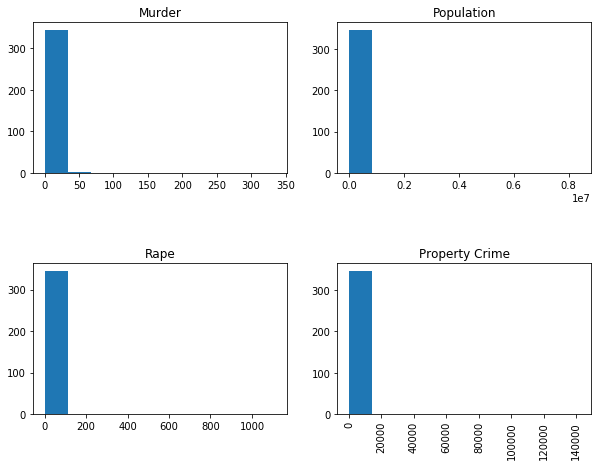

In [17]:
#histograms of metrics to be used

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
murder = data.Murder
plt.hist(murder, bins=10)
plt.title("Murder")


plt.subplot(2,2,2)
population = data.Population
plt.hist(population, bins=10)
plt.title("Population")


plt.subplot(2,2,3)
rape = data.Rape
plt.hist(rape, bins=10)
plt.title("Rape")

plt.subplot(2,2,4)
property_crime = data.Property_Crime
plt.hist(property_crime, bins=10)
plt.title("Property Crime")
plt.subplots_adjust(bottom = .2 , wspace = .2, hspace = .6)
plt.xticks(rotation ="vertical")
plt.show()


In [7]:
data.describe()

,Population,Murder,Rape (revised definition)1,Rape,Property_Crime,Arson3
count,3.480000e+02,348.000000,0.0,348.000000,348.000000,187.000000
mean,4.003763e+04,1.566092,NaN,5.864943,792.606322,1.871658
std,4.500374e+05,18.303673,NaN,60.425452,7659.724746,10.693411
min,5.260000e+02,0.000000,NaN,0.000000,0.000000,0.000000
25%,3.003000e+03,0.000000,NaN,0.000000,40.500000,0.000000
50%,7.233500e+03,0.000000,NaN,0.000000,112.500000,0.000000
75%,1.842750e+04,0.000000,NaN,2.000000,341.000000,1.000000
max,8.396126e+06,335.000000,NaN,1112.000000,141971.000000,132.000000


In [8]:
analysis_data = data[["City","Population","Murder","Rape","Property_Crime"]]


In [9]:
analysis_data.describe()

,Population,Murder,Rape,Property_Crime
count,3.480000e+02,348.000000,348.000000,348.000000
mean,4.003763e+04,1.566092,5.864943,792.606322
std,4.500374e+05,18.303673,60.425452,7659.724746
min,5.260000e+02,0.000000,0.000000,0.000000
25%,3.003000e+03,0.000000,0.000000,40.500000
50%,7.233500e+03,0.000000,0.000000,112.500000
75%,1.842750e+04,0.000000,2.000000,341.000000
max,8.396126e+06,335.000000,1112.000000,141971.000000


In [10]:
analysis_data= analysis_data.dropna()

In [11]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 5 columns):
City              348 non-null object
Population        348 non-null float64
Murder            348 non-null float64
Rape              348 non-null float64
Property_Crime    348 non-null float64
dtypes: float64(4), object(1)
memory usage: 16.3+ KB


In [12]:
analysis_data["population_squared"] = analysis_data["Population"] **2 
analysis_data["Murder"] = np.where(analysis_data.Murder >= 1, 1,0)
analysis_data["Rape"] = np.where(analysis_data.Rape >=1,1,0)


In [13]:
analysis_data.head()

,City,Population,Murder,Rape,Property_Crime,population_squared
0,Adams Village,1861.0,0,0,12.0,3.463321e+06
1,Addison Town and Village,2577.0,0,0,24.0,6.640929e+06
2,Akron Village,2846.0,0,0,16.0,8.099716e+06
3,Albany,97956.0,1,1,4090.0,9.595378e+09
4,Albion Village,6388.0,0,1,223.0,4.080654e+07


In [36]:
# Create model and show results
regr = linear_model.LinearRegression()
Y = analysis_data["Property_Crime"].values.reshape(-1,1)
X = analysis_data[["Murder","Rape","population_squared"]]
regr.fit(X,Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.10767409e+03   3.88420632e+02   1.99200253e-09]]

Intercept: 
 [ 70.4335578]

R-squared:
0.986188724285


Using the three variables suggested produced a strong R-squared, so at this point I will leave the model alone.  Most of the predictive power appears to come from population squared.  When that is taken out the R-squared drops dramatically.  Adding Murder and Rape serves to only increase it a small amount.